# Import Library

In [1]:
import pandas as pd
import numpy as np

# Dataset

In [2]:
df = pd.read_csv('cuaca.csv')
df.head()

,outlook,temperature,humidity,windy,play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Cloudy,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


# Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temperature','humidity','windy','play']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [6]:
df

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,1
6,0,0,1,1,0
7,2,2,0,0,1
8,2,0,1,0,1
9,1,2,1,0,1


# Split Data

In [7]:
# Kolom Target
y = df['play']

In [8]:
# drop target column from dataframe
df.drop('play', axis=1, inplace=True)

In [9]:
df

,outlook,temperature,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [10]:
X = df

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

# Classification dengan DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(max_depth=4)
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

# Visualisasi Model

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

In [14]:
feature_names = ['outlook', 'temperature', 'humidity', 'windy']

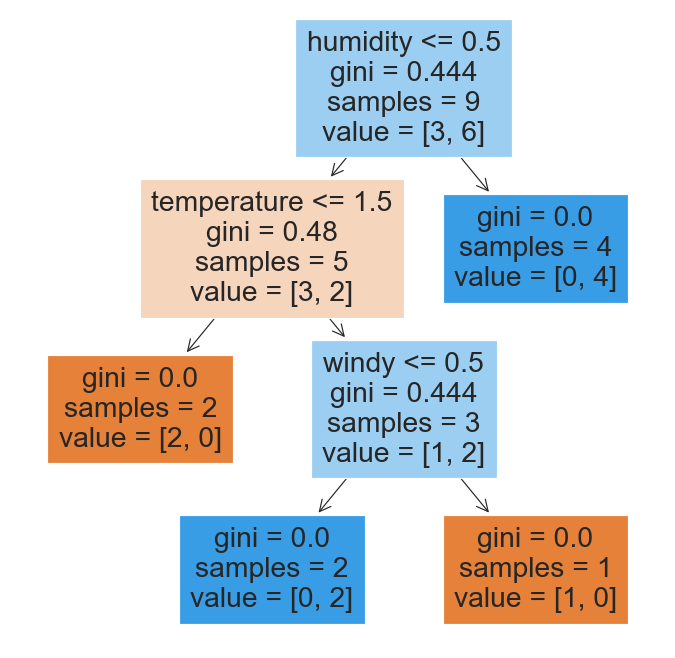

In [17]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model,
                   feature_names=feature_names,
                   filled=True)

# Evaluasi Model

In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.50      0.57         4

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5

